In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [90]:
pd.set_option('display.max_row', 1000) #affichier 100 lignes 
pd.set_option('display.max_column', 16) #affichier 15 colonnes 

In [91]:
data = pd.read_excel(r"C:\Users\amald\OneDrive\Documents\MEMOIRE_IFID\DataFinale.xlsx") #importer dataset

In [92]:
data.head()

,Rachat,Prime,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat
0,1,<1000,T,Producteur,18-40,50-60,F,15-20
1,1,<1000,NaN,Producteur,40-50,>60,F,>=20
2,1,<1000,A,Producteur,18-40,50-60,F,>=20
3,1,<1000,NaN,Producteur,18-40,50-60,M,15-20
4,1,<1000,T,Producteur,40-50,>60,M,15-20


# Analyse de la forme des données

In [93]:
df = data.copy()

In [94]:
df.shape #nombres de colonnes et lignes 

(18901, 8)

In [95]:
df.dtypes #types de variables 

Rachat                  int64
Prime                  object
Fréquence              object
Réseau_Distribution    object
Age_Souscription       object
Age_Survenance         object
Sexe                   object
Ancienneté_Contrat     object
dtype: object

In [96]:
df.dtypes.value_counts() #compter le nombre de types de variables 

object    7
int64     1
dtype: int64

In [97]:
df.isna()

,Rachat,Prime,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat
0,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
18896,False,False,False,False,False,False,False,False
18897,False,False,False,False,False,False,False,False
18898,False,False,False,False,False,False,False,False
18899,False,False,False,False,False,False,False,False


<AxesSubplot:>

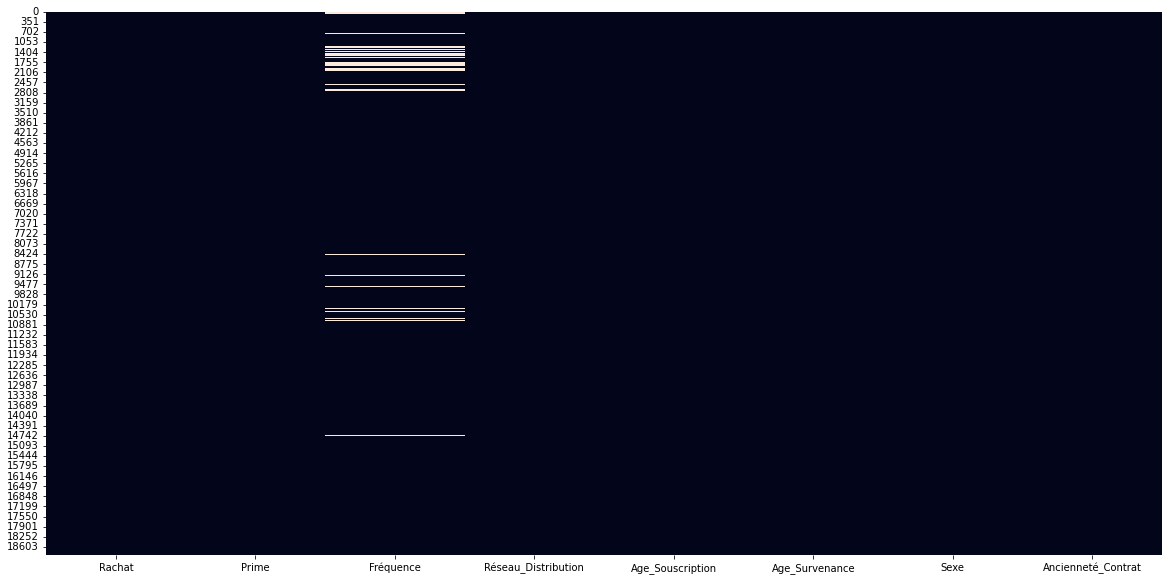

In [98]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [99]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True) #pourcentages de valeurs manquantes par variable par ordre ascendent

Rachat                 0.000000
Prime                  0.000000
Réseau_Distribution    0.000000
Sexe                   0.000000
Ancienneté_Contrat     0.000000
Age_Survenance         0.000106
Age_Souscription       0.000635
Fréquence              0.054706
dtype: float64

In [100]:
df

,Rachat,Prime,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat
0,1,<1000,T,Producteur,18-40,50-60,F,15-20
1,1,<1000,NaN,Producteur,40-50,>60,F,>=20
2,1,<1000,A,Producteur,18-40,50-60,F,>=20
3,1,<1000,NaN,Producteur,18-40,50-60,M,15-20
4,1,<1000,T,Producteur,40-50,>60,M,15-20
...,...,...,...,...,...,...,...,...
18896,1,5000-10000,T,Producteur,40-50,40-50,F,<10
18897,1,5000-10000,T,Producteur,50-60,50-60,M,<10
18898,0,5000-10000,A,Producteur,>60,>60,F,<10
18899,1,5000-10000,S,Producteur,50-60,50-60,M,<10


In [101]:
df['Rachat'].value_counts(normalize=True)

0    0.953389
1    0.046611
Name: Rachat, dtype: float64

### variables qualitatives 

In [102]:
for col in df.select_dtypes('object'):
    print(col,df[col].unique() )

Prime ['<1000' '>10000' '1000-2000' '2000-5000' '5000-10000']
Fréquence ['T' nan 'A' 'S' 'M']
Réseau_Distribution ['Producteur' 'Agent']
Age_Souscription ['18-40' '40-50' '<18' '50-60' '>60' nan]
Age_Survenance ['50-60' '>60' '40-50' '18-40' nan '<18']
Sexe ['F' 'M']
Ancienneté_Contrat ['15-20' '>=20' '10-15' '0-10' '<10']


In [103]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}') #on change la forme d'affichage

Prime--------------------------------------------- ['<1000' '>10000' '1000-2000' '2000-5000' '5000-10000']
Fréquence----------------------------------------- ['T' nan 'A' 'S' 'M']
Réseau_Distribution------------------------------- ['Producteur' 'Agent']
Age_Souscription---------------------------------- ['18-40' '40-50' '<18' '50-60' '>60' nan]
Age_Survenance------------------------------------ ['50-60' '>60' '40-50' '18-40' nan '<18']
Sexe---------------------------------------------- ['F' 'M']
Ancienneté_Contrat-------------------------------- ['15-20' '>=20' '10-15' '0-10' '<10']


# Pré-traitement de données 

In [104]:
df = data.copy()
df.head()

,Rachat,Prime,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat
0,1,<1000,T,Producteur,18-40,50-60,F,15-20
1,1,<1000,NaN,Producteur,40-50,>60,F,>=20
2,1,<1000,A,Producteur,18-40,50-60,F,>=20
3,1,<1000,NaN,Producteur,18-40,50-60,M,15-20
4,1,<1000,T,Producteur,40-50,>60,M,15-20


In [105]:
df.dropna(axis=0, inplace = True)

In [106]:
df.shape

(17859, 8)

In [107]:
df.columns


Index(['Rachat', 'Prime', 'Fréquence', 'Réseau_Distribution',
       'Age_Souscription', 'Age_Survenance', 'Sexe', 'Ancienneté_Contrat'],
      dtype='object')

In [108]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}') 

Prime--------------------------------------------- ['<1000' '>10000' '1000-2000' '2000-5000' '5000-10000']
Fréquence----------------------------------------- ['T' 'A' 'S' 'M']
Réseau_Distribution------------------------------- ['Producteur' 'Agent']
Age_Souscription---------------------------------- ['18-40' '40-50' '<18' '50-60' '>60']
Age_Survenance------------------------------------ ['50-60' '>60' '40-50' '18-40']
Sexe---------------------------------------------- ['F' 'M']
Ancienneté_Contrat-------------------------------- ['15-20' '>=20' '10-15' '0-10' '<10']


In [109]:
df.shape


(17859, 8)

## Encodage Selection des variables

In [110]:
# Making dummy variables of two columns:
df_dummies = pd.get_dummies(df, 
                            columns=['Prime', 'Fréquence', 'Réseau_Distribution',
       'Age_Souscription', 'Age_Survenance', 'Sexe', 'Ancienneté_Contrat'])
df_dummies.head()

,Rachat,Prime_1000-2000,Prime_2000-5000,Prime_5000-10000,Prime_<1000,Prime_>10000,Fréquence_A,Fréquence_M,...,Age_Survenance_>60,Sexe_F,Sexe_M,Ancienneté_Contrat_0-10,Ancienneté_Contrat_10-15,Ancienneté_Contrat_15-20,Ancienneté_Contrat_<10,Ancienneté_Contrat_>=20
0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0
2,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,...,1,0,1,0,0,1,0,0
5,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1
7,1,0,0,0,1,0,1,0,...,1,0,1,0,0,0,0,1


In [111]:
data = df_dummies.copy()

In [112]:
data.columns

Index(['Rachat', 'Prime_1000-2000', 'Prime_2000-5000', 'Prime_5000-10000',
       'Prime_<1000', 'Prime_>10000', 'Fréquence_A', 'Fréquence_M',
       'Fréquence_S', 'Fréquence_T', 'Réseau_Distribution_Agent',
       'Réseau_Distribution_Producteur', 'Age_Souscription_18-40',
       'Age_Souscription_40-50', 'Age_Souscription_50-60',
       'Age_Souscription_<18', 'Age_Souscription_>60', 'Age_Survenance_18-40',
       'Age_Survenance_40-50', 'Age_Survenance_50-60', 'Age_Survenance_>60',
       'Sexe_F', 'Sexe_M', 'Ancienneté_Contrat_0-10',
       'Ancienneté_Contrat_10-15', 'Ancienneté_Contrat_15-20',
       'Ancienneté_Contrat_<10', 'Ancienneté_Contrat_>=20'],
      dtype='object')

In [113]:
y=data['Rachat']
X=data.drop('Rachat',axis=1)

In [114]:
X

,Prime_1000-2000,Prime_2000-5000,Prime_5000-10000,Prime_<1000,Prime_>10000,Fréquence_A,Fréquence_M,Fréquence_S,...,Age_Survenance_>60,Sexe_F,Sexe_M,Ancienneté_Contrat_0-10,Ancienneté_Contrat_10-15,Ancienneté_Contrat_15-20,Ancienneté_Contrat_<10,Ancienneté_Contrat_>=20
0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0
2,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0
5,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1
7,0,0,0,1,0,1,0,0,...,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18896,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0
18897,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0
18898,0,0,1,0,0,1,0,0,...,1,1,0,0,0,0,1,0
18899,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0


# Modélisation

In [115]:
import sklearn
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [116]:
from sklearn.feature_selection import RFECV
selector = RFECV(LogisticRegression(random_state=0), step=1, min_features_to_select=3, cv=5)
selector.fit(X, y)
print(selector.ranking_)
print(selector.grid_scores_)

[22 17 21  9 10 16  7 24 14 12 18  5 20 13 19  6  1  1  3  2 11 15  4 23
  8  1  1]
[[0.98796193 0.98348264 0.98012318 0.98040314 0.97535704]
 [0.98796193 0.98544233 0.98012318 0.98180291 0.97647718]
 [0.98796193 0.98516237 0.9518477  0.98292273 0.97423691]
 [0.98796193 0.98516237 0.9756439  0.98292273 0.92439093]
 [0.98796193 0.98460246 0.9756439  0.981243   0.92439093]
 [0.98796193 0.98460246 0.97648376 0.981243   0.94231308]
 [0.98796193 0.98460246 0.97676372 0.98152296 0.93811257]
 [0.98796193 0.98460246 0.97732363 0.98152296 0.96275553]
 [0.98796193 0.98460246 0.97704367 0.98152296 0.94595351]
 [0.98796193 0.98460246 0.97200448 0.98152296 0.94679362]
 [0.98796193 0.98460246 0.97200448 0.98152296 0.94679362]
 [0.98796193 0.98404255 0.97172452 0.98152296 0.94651358]
 [0.98796193 0.98404255 0.97340426 0.98152296 0.94651358]
 [0.98796193 0.9837626  0.97340426 0.98152296 0.94651358]
 [0.98796193 0.98404255 0.97340426 0.98152296 0.94735368]
 [0.98796193 0.9837626  0.97340426 0.98152296 

In [117]:
mask = selector.get_support()
features = (X.columns) 
best_features = features[mask]
 
print("All features: ", X.shape[1])
print(features)
print("Selected best: ", best_features.shape[0])
print(features[mask]) 

All features:  27
Index(['Prime_1000-2000', 'Prime_2000-5000', 'Prime_5000-10000', 'Prime_<1000',
       'Prime_>10000', 'Fréquence_A', 'Fréquence_M', 'Fréquence_S',
       'Fréquence_T', 'Réseau_Distribution_Agent',
       'Réseau_Distribution_Producteur', 'Age_Souscription_18-40',
       'Age_Souscription_40-50', 'Age_Souscription_50-60',
       'Age_Souscription_<18', 'Age_Souscription_>60', 'Age_Survenance_18-40',
       'Age_Survenance_40-50', 'Age_Survenance_50-60', 'Age_Survenance_>60',
       'Sexe_F', 'Sexe_M', 'Ancienneté_Contrat_0-10',
       'Ancienneté_Contrat_10-15', 'Ancienneté_Contrat_15-20',
       'Ancienneté_Contrat_<10', 'Ancienneté_Contrat_>=20'],
      dtype='object')
Selected best:  4
Index(['Age_Survenance_18-40', 'Age_Survenance_40-50',
       'Ancienneté_Contrat_<10', 'Ancienneté_Contrat_>=20'],
      dtype='object')


In [118]:
var_select=['Age_Survenance_18-40', 'Age_Survenance_40-50',
       'Ancienneté_Contrat_<10', 'Ancienneté_Contrat_>=20']
X_lr=X[var_select]

In [119]:
# Splitting Train and Test Data
X_train_lr,X_test_lr,y_train_lr,y_test_lr  = train_test_split(X_lr,
                                              y,
                                              test_size=0.3,
                                              random_state = 30)

## REGRESSION LOGISTIQUE

In [120]:
model_lr=LogisticRegression()
model_lr.fit(X_train_lr, y_train_lr)
pred_lr= model_lr.predict(X_test_lr)

In [121]:
# Evaluate
print(confusion_matrix(y_test_lr, pred_lr))
print(classification_report(y_test_lr, pred_lr))


[[5118   13]
 [  71  156]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5131
           1       0.92      0.69      0.79       227

    accuracy                           0.98      5358
   macro avg       0.95      0.84      0.89      5358
weighted avg       0.98      0.98      0.98      5358



In [122]:
# Define feature selection method
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

model1 = LogisticRegression()

params = {
    'penalty'      : ['none', 'l1', 'l2', 'elasticnet'],
    'C'            : [0.001, 0.005, 0.01, 0.25, 0.5, 0.75, 0.9, 1, 1.01, 1.05, 1.1, 1.15, 1.2],
    'solver'       : ['newton-cg', 'lbfgs', 'liblinear'],
    'fit_intercept': [True, False]
}
search = GridSearchCV(model1, params, scoring='f1', n_jobs=-1, cv=3)
result = search.fit(X_train_lr, y_train_lr)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7698716549797435
Best Hyperparameters: {'C': 0.001, 'fit_intercept': False, 'penalty': 'none', 'solver': 'newton-cg'}


In [123]:
model_lr_cv=LogisticRegression(C= 0.001, fit_intercept=False, penalty='none', solver='newton-cg')
model_lr_cv.fit(X_train_lr, y_train_lr)
pred_lr_cv= model_lr_cv.predict(X_test_lr)

# Evaluate
print(confusion_matrix(y_test_lr, pred_lr_cv))
print(classification_report(y_test_lr, pred_lr_cv))

[[5118   13]
 [  71  156]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5131
           1       0.92      0.69      0.79       227

    accuracy                           0.98      5358
   macro avg       0.95      0.84      0.89      5358
weighted avg       0.98      0.98      0.98      5358



In [124]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
auc_lr = metrics.roc_auc_score(y_test_lr,pred_lr_cv)
print(auc_lr)

0.842345525212988


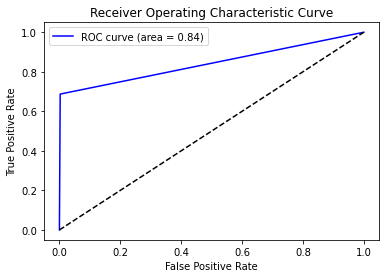

In [125]:
from sklearn import metrics

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='blue', label="ROC curve (area = %0.2f)" % auc_lr)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()  
fper, tper, thresholds = roc_curve(y_test_lr, pred_lr_cv)
plot_roc_curve(fper, tper)

## ARBRE DE DECISION

In [129]:
data = df_dummies.copy()

In [130]:
y=data['Rachat']
X=data.drop('Rachat',axis=1)

In [131]:
from sklearn.feature_selection import RFECV
selector = RFECV( DecisionTreeClassifier(random_state=0), step=1, min_features_to_select=3, cv=5)
selector.fit(X, y)
print(selector.ranking_)
print(selector.grid_scores_)

[14  9 11  6 18  8  4 19 16 10 17  2 12 22 23 24  1  1  3 21 13  7 20 15
  5  1  1]
[[0.98796193 0.98348264 0.98012318 0.98040314 0.97535704]
 [0.98796193 0.98544233 0.98012318 0.98180291 0.97647718]
 [0.98796193 0.98544233 0.97984323 0.98180291 0.97647718]
 [0.98796193 0.98516237 0.97984323 0.98180291 0.88994679]
 [0.98796193 0.98516237 0.95212766 0.98012318 0.88490619]
 [0.98740202 0.98404255 0.95212766 0.97956327 0.88406609]
 [0.98740202 0.98404255 0.95212766 0.97900336 0.88490619]
 [0.98740202 0.98432251 0.95296753 0.97956327 0.88602632]
 [0.98684211 0.98320269 0.95240761 0.98040314 0.88602632]
 [0.98796193 0.98236282 0.95240761 0.98040314 0.88630636]
 [0.98684211 0.98152296 0.95296753 0.97284434 0.90898908]
 [0.98600224 0.97844345 0.95352744 0.97088466 0.91010921]
 [0.98740202 0.97816349 0.95380739 0.97116461 0.91010921]
 [0.98712206 0.97928331 0.95324748 0.97032475 0.91542985]
 [0.98712206 0.97956327 0.95324748 0.97004479 0.91767012]
 [0.98740202 0.9787234  0.95324748 0.97088466 

In [132]:
mask = selector.get_support()
features = (X.columns) 
best_features = features[mask]
print("Selected best: ", best_features.shape[0])
print(features[mask]) 

Selected best:  4
Index(['Age_Survenance_18-40', 'Age_Survenance_40-50',
       'Ancienneté_Contrat_<10', 'Ancienneté_Contrat_>=20'],
      dtype='object')


In [134]:
var_select=['Age_Survenance_18-40', 'Age_Survenance_40-50',
       'Ancienneté_Contrat_<10', 'Ancienneté_Contrat_>=20']
X_ad=X[var_select]

In [136]:
# Splitting Train and Test Data
X_train_ad,X_test_ad,y_train_ad,y_test_ad  = train_test_split(X_ad,
                                              y,
                                              test_size=0.3,
                                              random_state = 42)


In [137]:
model2 = DecisionTreeClassifier()
model2.fit(X_train_ad, y_train_ad)
pred2 = model2.predict(X_test_ad)

# Evaluate
print(confusion_matrix(y_test_ad, pred2))
print(classification_report(y_test_ad, pred2))

[[5102   17]
 [  80  159]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5119
           1       0.90      0.67      0.77       239

    accuracy                           0.98      5358
   macro avg       0.94      0.83      0.88      5358
weighted avg       0.98      0.98      0.98      5358



In [138]:
# Define feature selection method
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
model2 = DecisionTreeClassifier()

params = {
    'min_samples_split'      : [20,30,40,50,60,70,80,90,100,],
    'max_depth'            : [5,6,7,8],
    'min_samples_leaf'       : [30,50,75,100],
}
search = GridSearchCV(model2, params, scoring='accuracy', n_jobs=-1, cv=3)
CV_model2 = search.fit(X_train_ad, y_train_ad)

# summarize result
print('Best Score: %s' % CV_model2.best_score_)
print('Best Hyperparameters: %s' % CV_model2.best_params_)

Best Score: 0.9814414846812255
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 20}


In [139]:
model2_cv = DecisionTreeClassifier(max_depth= 5,min_samples_leaf= 30, min_samples_split= 20)
model2_cv.fit(X_train_ad, y_train_ad)
pred2_cv = model2_cv.predict(X_test_ad)
# Evaluate
print(confusion_matrix(y_test_ad, pred2_cv))
print(classification_report(y_test_ad, pred2_cv))

[[5102   17]
 [  80  159]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5119
           1       0.90      0.67      0.77       239

    accuracy                           0.98      5358
   macro avg       0.94      0.83      0.88      5358
weighted avg       0.98      0.98      0.98      5358



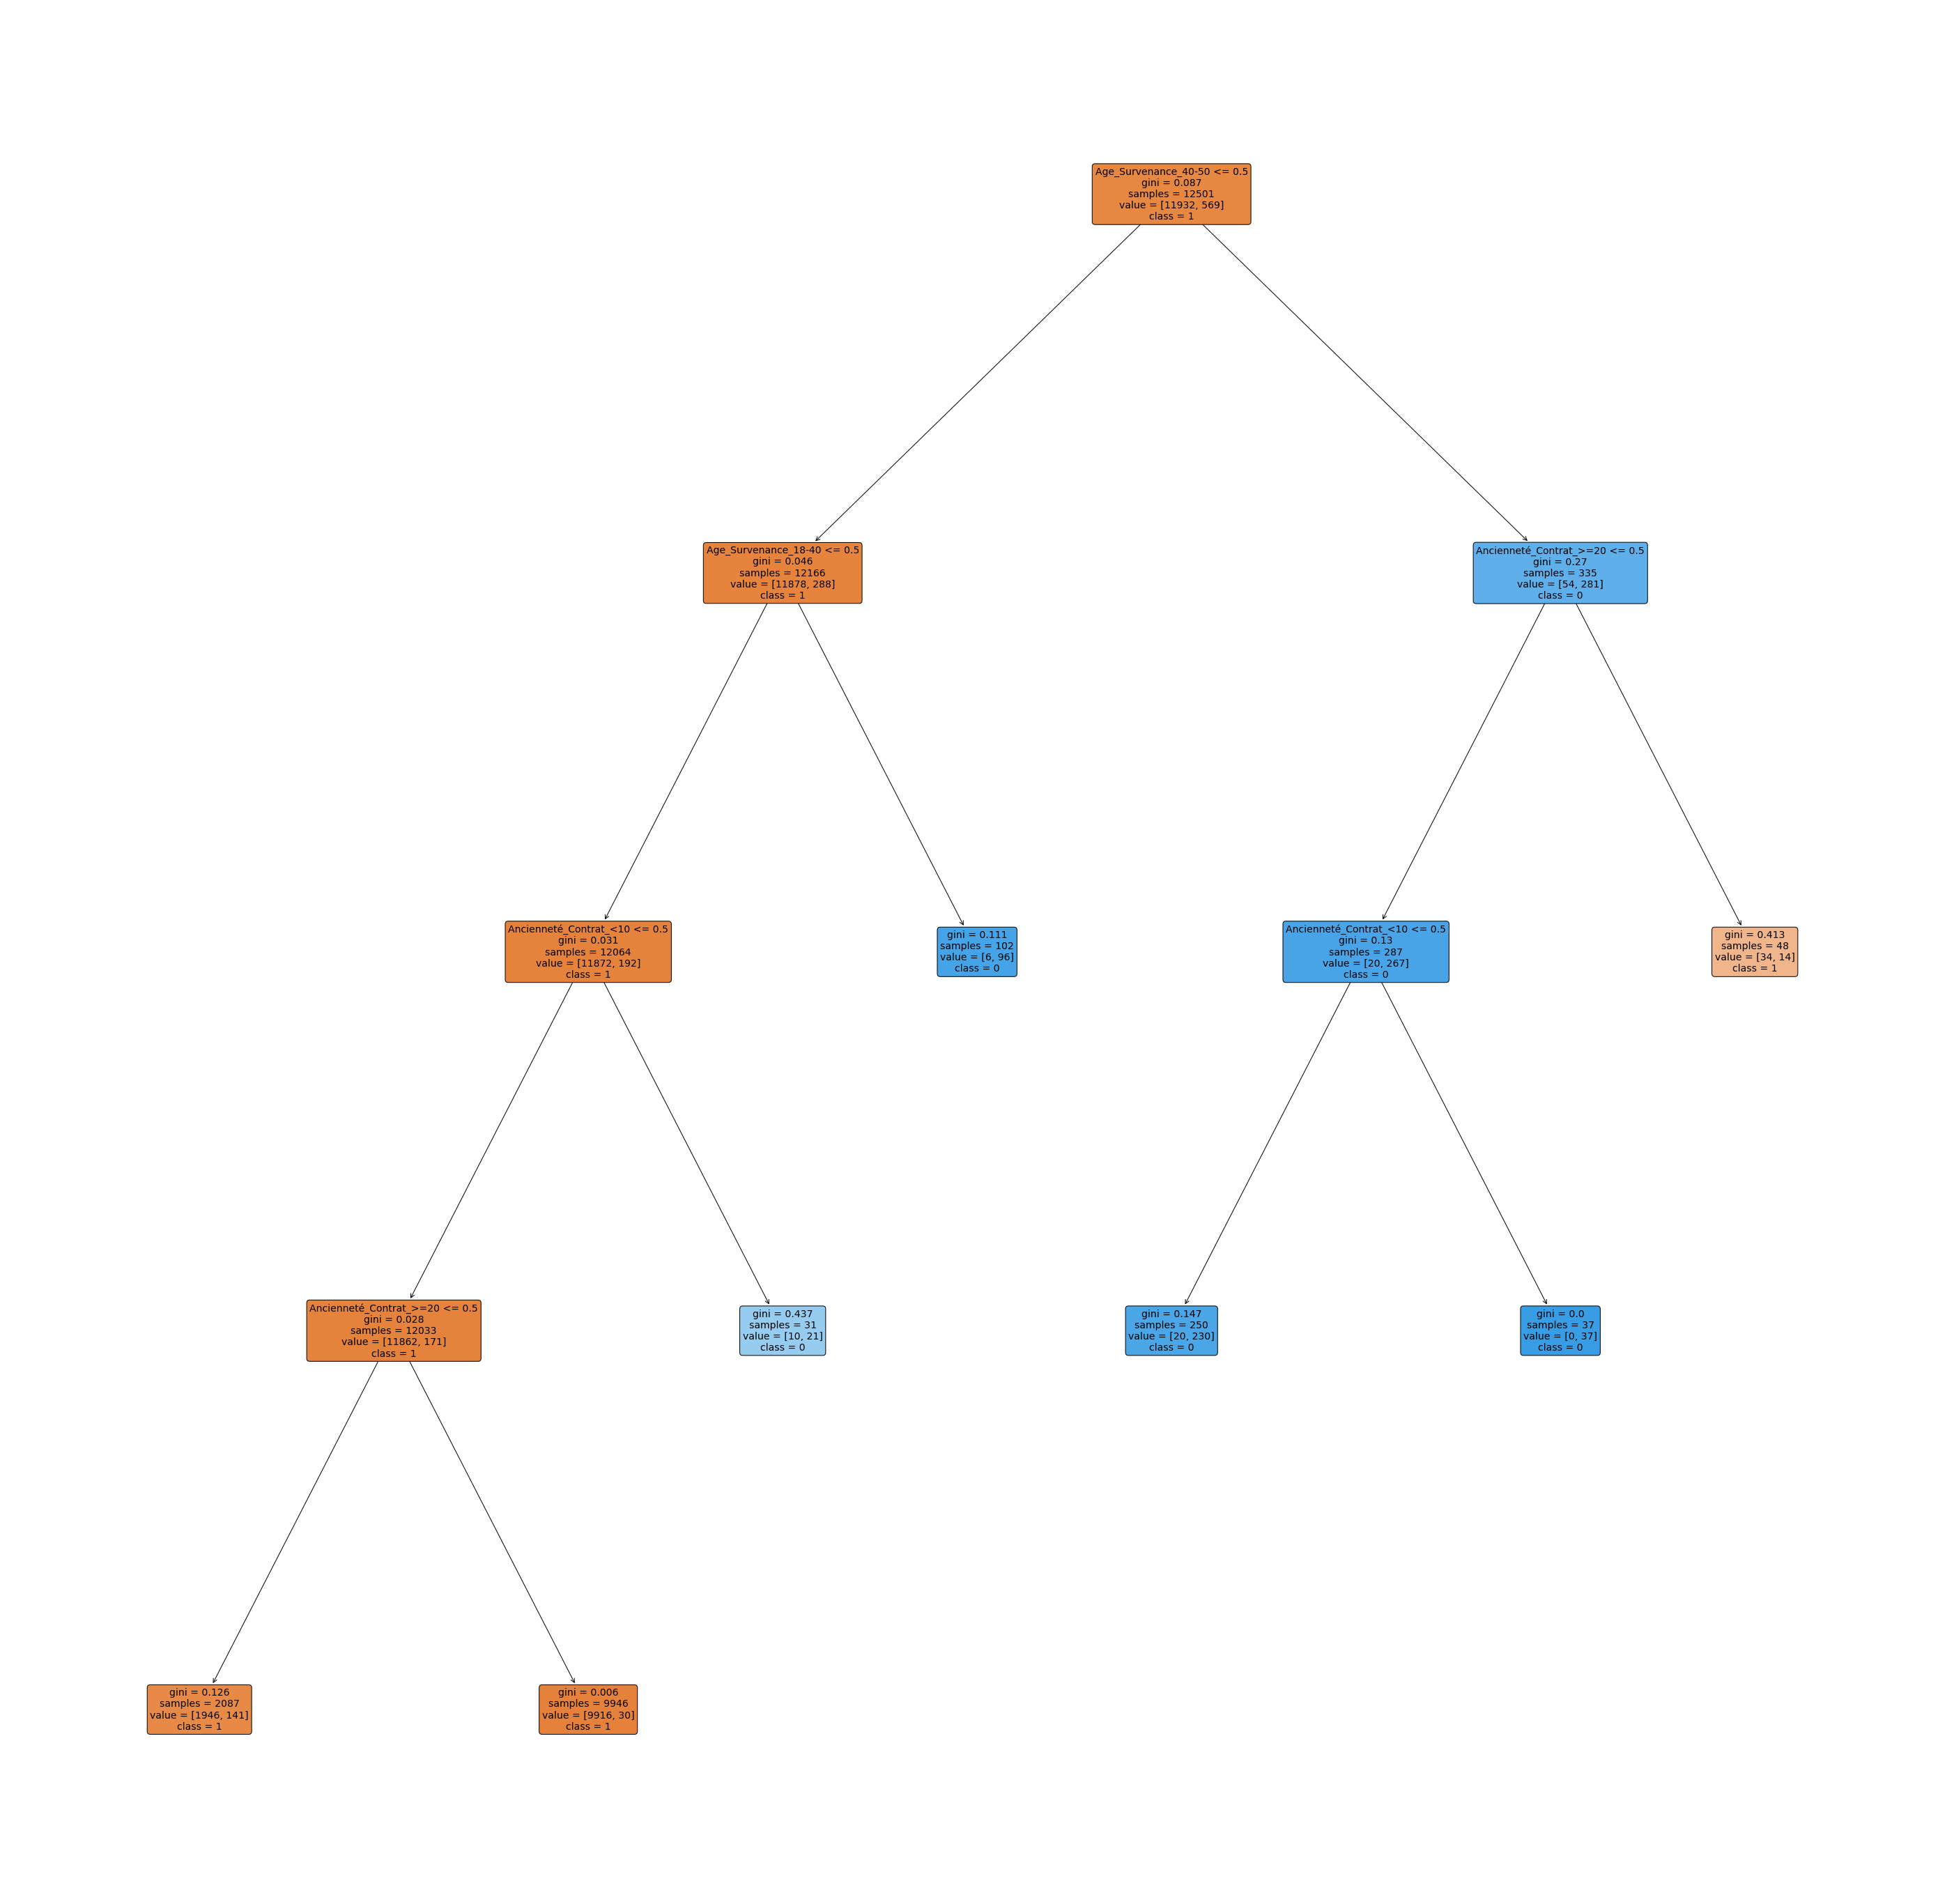

In [54]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
a = plot_tree(model2_cv, 
              feature_names=X_ad.columns,    
              class_names=y.unique().astype(str), 
              filled=True, 
              rounded=True, 
              fontsize=14)
plt.savefig('arbre.png', transparent=True,
bbox_inches='tight',dpi=100)
plt.show()

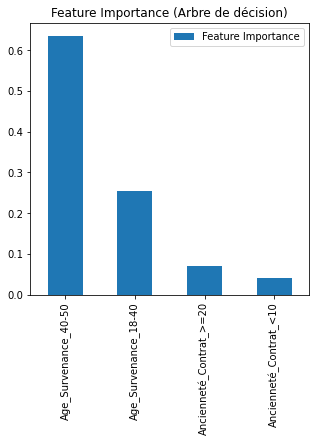

In [140]:
feat_importances = pd.DataFrame(model2_cv.feature_importances_, index=X_ad.columns, columns=["Feature Importance"])
feat_importances.sort_values(by='Feature Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(5,5), fontsize=10)
plt.title("Feature Importance (Arbre de décision)")
plt.savefig('Featureinpo_arbre.png', transparent=True,
bbox_inches='tight',dpi=100)
plt.show()

In [141]:
feat_importances

,Feature Importance
Age_Survenance_40-50,0.635297
Age_Survenance_18-40,0.253947
Ancienneté_Contrat_>=20,0.070265
Ancienneté_Contrat_<10,0.040490


In [142]:
auc_ad = metrics.roc_auc_score(y_test_ad,pred2_cv)
print(auc_ad)

0.8309755027009885


## RONDOM FOREST

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
data1 = df_dummies.copy()

In [145]:
y=data1['Rachat']
X=data1.drop('Rachat',axis=1)

In [146]:
from sklearn.feature_selection import RFECV
selector = RFECV(RandomForestClassifier(), step=1, min_features_to_select=1, cv=5)
selector.fit(X, y)
print(selector.ranking_)


[ 9  6 15 11 18  5 10 17 13 16  8  1  3 12 19 20  1  1  1  1  7 14  1  2
  4  1  1]


In [147]:
mask = selector.get_support()
features = (X.columns) 
best_features = features[mask]
 

print("Selected best: ", best_features.shape[0])
print(features[mask]) 

Selected best:  8
Index(['Age_Souscription_18-40', 'Age_Survenance_18-40',
       'Age_Survenance_40-50', 'Age_Survenance_50-60', 'Age_Survenance_>60',
       'Ancienneté_Contrat_0-10', 'Ancienneté_Contrat_<10',
       'Ancienneté_Contrat_>=20'],
      dtype='object')


In [149]:
var_select=['Age_Souscription_18-40', 'Age_Survenance_18-40',
       'Age_Survenance_40-50', 'Age_Survenance_50-60', 'Age_Survenance_>60',
       'Ancienneté_Contrat_0-10', 'Ancienneté_Contrat_<10',
       'Ancienneté_Contrat_>=20']
X_fa=X[var_select]

In [150]:
# Splitting Train and Test Data
X_train_fa,X_test_fa,y_train_fa,y_test_fa  = train_test_split(X_fa,
                                              y,
                                              test_size=0.3,
                                              random_state = 42)

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

rfc1=RandomForestClassifier()
rfc1.fit(X_train_fa, y_train_fa)
pred_rfc1= rfc1.predict(X_test_fa)


In [152]:
# Evaluate
print(confusion_matrix(y_test_fa, pred_rfc1))
print(classification_report(y_test_ad, pred_rfc1))

[[5105   14]
 [  81  158]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5119
           1       0.92      0.66      0.77       239

    accuracy                           0.98      5358
   macro avg       0.95      0.83      0.88      5358
weighted avg       0.98      0.98      0.98      5358



In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

rfc=RandomForestClassifier(random_state=30)
param_grid = { 
    'n_estimators': [100,200,300,400,500],
    'max_features': [2,3,4,5],
    'max_depth' : [4,5,6,7,8],
   
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid,scoring ="f1", cv= 5)
CV_rfc.fit(X_train_fa, y_train_fa)
CV_rfc.best_params_
CV_rfc.best_estimator_
# summarize result
print('Best Score: %s' % CV_rfc.best_score_)
print('Best Hyperparameters: %s' % CV_rfc.best_params_)

Best Score: 0.7822132950529663
Best Hyperparameters: {'max_depth': 4, 'max_features': 2, 'n_estimators': 100}


In [154]:
model3_cv = RandomForestClassifier( max_depth=4, max_features=2,
                       n_estimators=100, random_state=30)
model3_cv.fit(X_train_fa, y_train_fa)
pred3_cv= model3_cv.predict(X_test_fa)

# Evaluate
print(confusion_matrix(y_test_fa, pred3_cv))
print(classification_report(y_test_fa, pred3_cv))

[[5105   14]
 [  82  157]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5119
           1       0.92      0.66      0.77       239

    accuracy                           0.98      5358
   macro avg       0.95      0.83      0.88      5358
weighted avg       0.98      0.98      0.98      5358



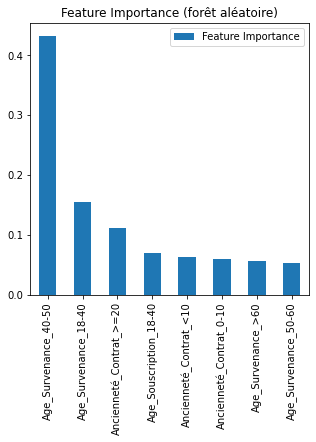

In [155]:
feat_importances = pd.DataFrame(model3_cv.feature_importances_, index=X_fa.columns, columns=["Feature Importance"])
feat_importances.sort_values(by='Feature Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(5,5), fontsize=10)
plt.title("Feature Importance (forêt aléatoire)")
plt.savefig('FI_RF.png', transparent=True,
bbox_inches='tight',dpi=100)
plt.show()


In [156]:
auc_fa = metrics.roc_auc_score(y_test_fa,pred2_cv)
print(auc_ad)

0.8309755027009885


# XGBOOST

In [157]:
data2 = df_dummies.copy()


In [158]:
y=data2['Rachat']
X=data2.drop('Rachat',axis=1)

In [159]:
import xgboost as xgb
from sklearn.feature_selection import RFECV
selector = RFECV(xgb.XGBClassifier(), step=1, min_features_to_select=1, cv=5)
selector.fit(X, y)
print(selector.ranking_)
print(selector.grid_scores_)

[17 14 15  8 18 10  4 19 11  9 22  1  3  5 20 16  1  1  1  2 12 21  7 13
  6  1  1]
[[0.95464726 0.95464726 0.95464726 0.95492721 0.95491459]
 [0.97452408 0.97424412 0.97228443 0.97536394 0.97255671]
 [0.98796193 0.98348264 0.98012318 0.98040314 0.97535704]
 [0.98796193 0.98544233 0.9518477  0.98180291 0.97647718]
 [0.98796193 0.98544233 0.9518477  0.98180291 0.97647718]
 [0.98796193 0.98460246 0.9756439  0.98292273 0.97815738]
 [0.98796193 0.98432251 0.9756439  0.98292273 0.97815738]
 [0.98796193 0.98432251 0.9756439  0.98208287 0.97591711]
 [0.98796193 0.98432251 0.9756439  0.98180291 0.88434612]
 [0.98768197 0.98432251 0.9756439  0.98264278 0.88434612]
 [0.98768197 0.98432251 0.97648376 0.98264278 0.91122935]
 [0.98712206 0.98544233 0.97704367 0.97928331 0.90730888]
 [0.98712206 0.98544233 0.97732363 0.97956327 0.90730888]
 [0.98656215 0.98460246 0.97704367 0.97452408 0.90534864]
 [0.98628219 0.98404255 0.97592385 0.97340426 0.91514982]
 [0.98684211 0.98264278 0.97368421 0.97676372 

In [160]:
mask = selector.get_support()
features = (X.columns) 
best_features = features[mask]
 

print("Selected best: ", best_features.shape[0])
print(features[mask]) 

Selected best:  6
Index(['Age_Souscription_18-40', 'Age_Survenance_18-40',
       'Age_Survenance_40-50', 'Age_Survenance_50-60',
       'Ancienneté_Contrat_<10', 'Ancienneté_Contrat_>=20'],
      dtype='object')


In [161]:
var_select=['Age_Souscription_18-40', 'Age_Survenance_18-40',
       'Age_Survenance_40-50', 'Age_Survenance_50-60']
X_xgb=X[var_select]

In [162]:
# Splitting Train and Test Data
X_train_xgb,X_test_xgb,y_train_xgb,y_test_xgb  = train_test_split(X_xgb,
                                              y,
                                              test_size=0.3,
                                              random_state = 42)

In [163]:
import xgboost as xgb
model4 = xgb.XGBClassifier()
model4.fit(X_train_xgb, y_train_xgb)
pred4 = model4.predict(X_test_xgb)


# Evaluate
print(confusion_matrix(y_test_xgb, pred4))
print(classification_report(y_test_xgb, pred4))


[[5090   29]
 [  85  154]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5119
           1       0.84      0.64      0.73       239

    accuracy                           0.98      5358
   macro avg       0.91      0.82      0.86      5358
weighted avg       0.98      0.98      0.98      5358



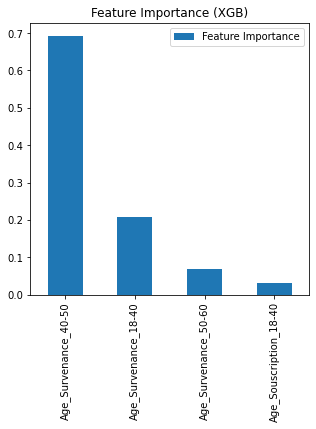

In [164]:
feat_importances = pd.DataFrame(model4.feature_importances_, index=X_xgb.columns, columns=["Feature Importance"])
feat_importances.sort_values(by='Feature Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(5,5), fontsize=10)
plt.title("Feature Importance (XGB)")
plt.savefig('FI_XGB.png', transparent=True,
bbox_inches='tight',dpi=100)
plt.show()


In [165]:
print(model4.feature_importances_)

[0.03064406 0.20827568 0.6931801  0.06790017]


In [80]:
xgb_model = xgb.XGBClassifier()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'learning_rate': [0.01,0.02,0.03,0.04,0.05], #so called `eta` value
              'max_depth': [4,5,7,6],
              'n_estimators': [100,200,300,400,500], #number of tree
             }
clf1 = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=5, 
                   scoring='accuracy',
                   verbose=2, refit=True)
mod=clf1.fit(X_train_xgb, y_train_xgb)
# summarize
print('Mean Accuracy: %.3f' % mod.best_score_)
print('Config: %s' % mod.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mean Accuracy: 0.980
Config: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'nthread': 4}


In [166]:
import xgboost as xgb
model4 = xgb.XGBClassifier( learning_rate= 0.01,max_depth=4, n_estimators= 100,nthread=4)
model4.fit(X_train_xgb, y_train_xgb)
model4.fit(X_train_xgb, y_train_xgb)
pred4 = model4.predict(X_test_xgb)


# Evaluate
print(confusion_matrix(y_test_xgb, pred4))   
print(classification_report(y_test_xgb, pred4))


[[5090   29]
 [  85  154]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5119
           1       0.84      0.64      0.73       239

    accuracy                           0.98      5358
   macro avg       0.91      0.82      0.86      5358
weighted avg       0.98      0.98      0.98      5358



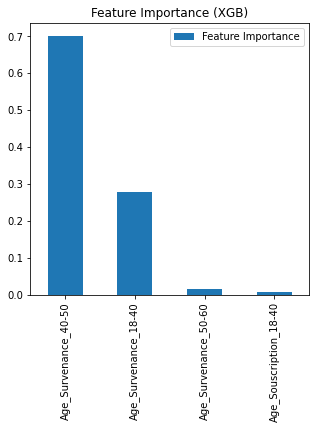

In [167]:
feat_importances = pd.DataFrame(model4.feature_importances_, index=X_xgb.columns, columns=["Feature Importance"])
feat_importances.sort_values(by='Feature Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(5,5), fontsize=10)
plt.title("Feature Importance (XGB)")
plt.savefig('FI_XGB.png', transparent=True,
bbox_inches='tight',dpi=100)
plt.show()


In [168]:
auc_xgb = metrics.roc_auc_score(y_test_xgb,pred4)
print(auc_xgb)

0.8193431477284152


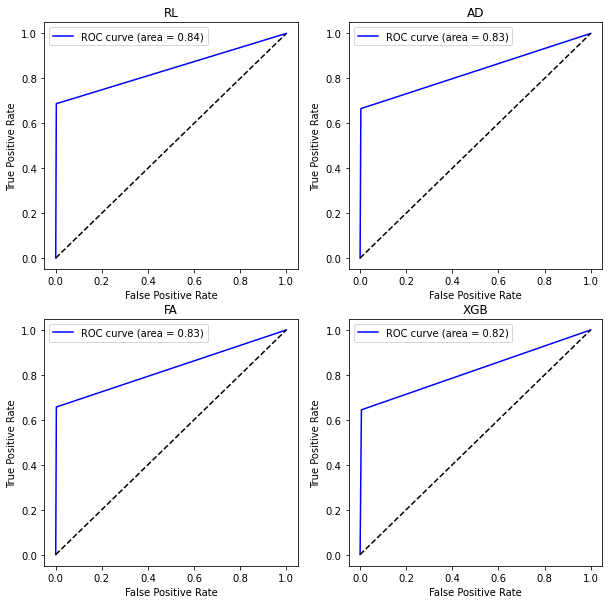

In [170]:
import matplotlib.pyplot as plt

plt.figure (figsize= (10, 10)) 
# Arguments to subplot are (# rows, # cols, index in grid)
plt.subplot(2, 2, 1)
# Modify left plot here
def plot_roc_curve(fper, tper):
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.plot(fper, tper, color='blue',label="ROC curve (area = %0.2f)" % auc_lr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RL')
    plt.legend()
fper, tper, thresholds = roc_curve(y_test_lr, pred_lr_cv)
plot_roc_curve(fper, tper)

plt.subplot(2, 2, 2)

def plot_roc_curve(fper, tper):
    
    plt.plot(fper, tper, color='blue', label="ROC curve (area = %0.2f)" % auc_ad)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AD')
    plt.legend()  
fper, tper, thresholds = roc_curve(y_test_ad, pred2_cv)
plot_roc_curve(fper, tper)

plt.subplot(2, 2, 3)

def plot_roc_curve(fper, tper):
    
    plt.plot(fper, tper, color='blue', label="ROC curve (area = %0.2f)" % auc_fa)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('FA')
    plt.legend()  

fper, tper, thresholds = roc_curve(y_test_fa, pred3_cv)
plot_roc_curve(fper, tper)
plt.subplot(2, 2, 4)
def plot_roc_curve(fper, tper):
    
    plt.plot(fper, tper, color='blue', label="ROC curve (area = %0.2f)" % auc_xgb)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('XGB')
    plt.legend()  

fper, tper, thresholds = roc_curve(y_test_xgb, pred4)
plot_roc_curve(fper, tper)

plt.savefig('roc-all')
plt.show()
